In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_path = "/content/drive/My Drive/NeuroSpeechBert_Dataset"
os.listdir(dataset_path)

['Demographics_age_sex (1).xlsx',
 'PD_AH',
 'HC_AH',
 'extracted_features.csv',
 'best_mel_model.h5',
 'mel_model.h5',
 'mel_model_cm.png',
 'mel_model_history.png',
 'spectrograms',
 'extracted_features(2).csv',
 'selected_features.csv']

In [ ]:
import pandas as pd

# Load metadata file
metadata_file = os.path.join(dataset_path, "Demographics_age_sex (1).xlsx")
df = pd.read_excel(metadata_file)


print(df.head())


                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


In [ ]:
df['Sample ID'] = df['Sample ID'].astype(str) + ".wav"

In [ ]:
hc_folder = os.path.join(dataset_path, "HC_AH/HC_AH")
pd_folder = os.path.join(dataset_path, "PD_AH")

hc_files = os.listdir(hc_folder) if os.path.exists(hc_folder) else []
pd_files = os.listdir(pd_folder) if os.path.exists(pd_folder) else []
all_files = set(hc_files).union(set(pd_files))

In [ ]:
print(hc_files[:10])
print(pd_files[:10])

['AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav', 'AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav', 'AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav', 'AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav', 'AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav', 'AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav', 'AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav', 'AH_456K_CBF60DD0-82AA-430E-A5E9-E1D3AE175CCB.wav', 'AH_322A_C3BF5535-A11E-498E-94EB-BE7E74099FFB.wav', 'AH_197T_7552379A-2310-46E1-9466-9D8045C990B8.wav']
['AH_545753014-C68926CC-AB91-49AF-90A6-BB5C434283DB.wav', 'AH_545629296-C2C009C6-8C17-42EA-B6BE-362942FC4692.wav', 'AH_545713224-1B3708B0-8792-4FEE-B03B-C7CB9CB03D58.wav', 'AH_545648867-CB17D873-1CEA-492A-B5B0-93C7463F516C.wav', 'AH_545692315-C2972597-9AEC-4060-A186-F1F59340640C.wav', 'AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A.wav', 'AH_545713222-DA13DC3A-F24B-454E-984F-19DF19328D39.wav', 'AH_545743929-E2EAE1A3-7E46-4DCF-8DB7-37A5CA47DB9D.wav', 'AH_545643618-82A143AC

In [ ]:
# Find missing files
missing_in_files = set(df['Sample ID']) - all_files
missing_in_metadata = all_files - set(df['Sample ID'])

print(f"Samples in metadata but missing in files: {len(missing_in_files)}")
print(f"Samples in files but missing in metadata: {len(missing_in_metadata)}")

Samples in metadata but missing in files: 0
Samples in files but missing in metadata: 0


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!pip install numpy


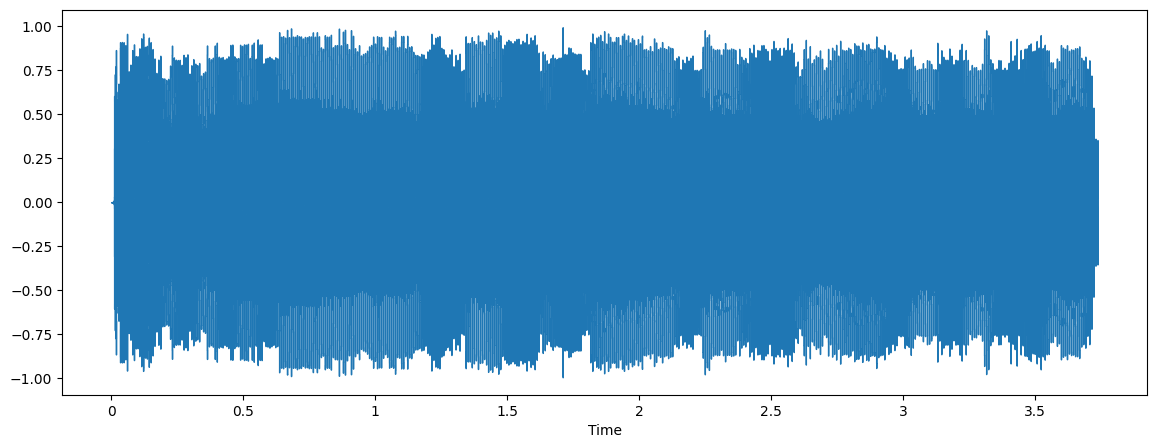

In [ ]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate #LIBROSA ALWAYS GIVES 22050

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate  #original smaple rate

16000

In [ ]:
def preprocess_audio(file_path, target_sr=16000):
    """Loads, normalizes, and trims silent parts from an audio file."""
    y, sr = librosa.load(file_path, sr=target_sr, mono=True)  # Load with target sample rate
    y = y / np.max(np.abs(y))  # Normalize amplitude
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)  # Trim silence

    return y, y_trimmed, sr  # Return both original and trimmed versions


In [ ]:
import numpy as np
sample_file = os.path.join(hc_folder, "AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav")
y, y_trimmed, sr = preprocess_audio(sample_file)

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

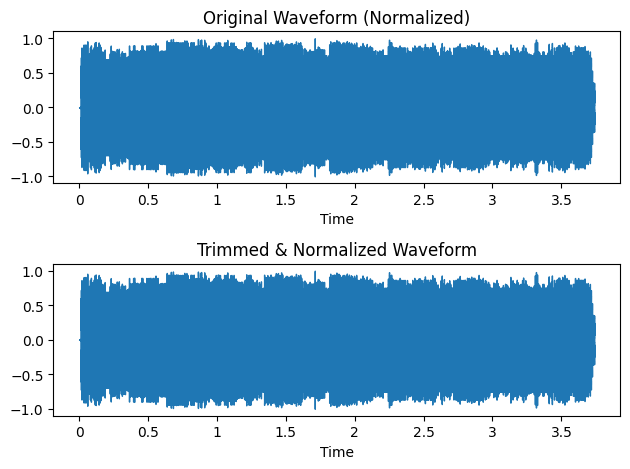

In [ ]:
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Original Waveform (Normalized)")

# Trimmed waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_trimmed, sr=sr)
plt.title("Trimmed & Normalized Waveform")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
!pip install soundfile # Install the soundfile library
import soundfile as sf # Import the library and alias it as 'sf'
from tqdm import tqdm

In [ ]:
wave_audio

array([   15,    17,    13, ..., -7961, -8779, -4841], dtype=int16)

PREPROCESSING OF METADATA FILE

In [ ]:
metadata_file = os.path.join(dataset_path, "Demographics_age_sex (1).xlsx")
df = pd.read_excel(metadata_file)

print(df.head())

                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


In [ ]:
# Check for missing values
print(df.isnull().sum())


Sample ID    0
Label        0
Age          0
Sex          0
dtype: int64


In [ ]:
import os

# Define the folder paths (change these to your actual paths)
hc_folder = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH"
pd_folder = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/PD_AH"

# List all files in both folders
hc_files = set(os.listdir(hc_folder))
pd_files = set(os.listdir(pd_folder))

# Merge both sets
all_files = hc_files.union(pd_files)

print("Total files in dataset:", len(all_files))
print("First 10 files:", list(all_files)[:10])


Total files in dataset: 81
First 10 files: ['AH_501F_4BDDBB93-EA99-4B1C-AD7F-4D874F39FB0C.wav', 'AH_545789671-794D2256-DDFF-4009-8BA8-8A306C8FA14F.wav', 'AH_333L_6C551A6E-CC47-410E-AA49-2DC0A86E6489.wav', 'AH_545789680-7FF9D4F1-DDCC-4CB6-8668-76530D670FA5.wav', 'AH_545743929-E2EAE1A3-7E46-4DCF-8DB7-37A5CA47DB9D.wav', 'AH_621N_204CF3E2-1DA0-4908-A47F-78997B1BAFC2.wav', 'AH_569E_B26CCA1E-29AD-48DD-9947-48DB8A56CA31.wav', 'AH_789Y_20CB672C-5F66-425E-8707-BE5B7FF807E2.wav', 'AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A.wav', 'AH_545789674-53885025-35F1-48C1-9826-BAAEB8BEAF58.wav']


In [ ]:
import pandas as pd
metadata_file = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/Demographics_age_sex (1).xlsx"
df = pd.read_excel(metadata_file)

metadata_files = set(df['Sample ID'].astype(str) + ".wav")

# Find missing files
missing_in_files = metadata_files - all_files
missing_in_metadata = all_files - metadata_files

print(f"Samples in metadata but missing in files: {len(missing_in_files)}")
print(f"Samples in files but missing in metadata: {len(missing_in_metadata)}")

# Show some examples
print("Examples missing in files:", list(missing_in_files)[:5])
print("Examples missing in metadata:", list(missing_in_metadata)[:5])

Samples in metadata but missing in files: 0
Samples in files but missing in metadata: 0
Examples missing in files: []
Examples missing in metadata: []


PREPROCESSING AUDIO FILES

Sampling Rate: 16000 Hz
Audio Duration: 3.74 seconds


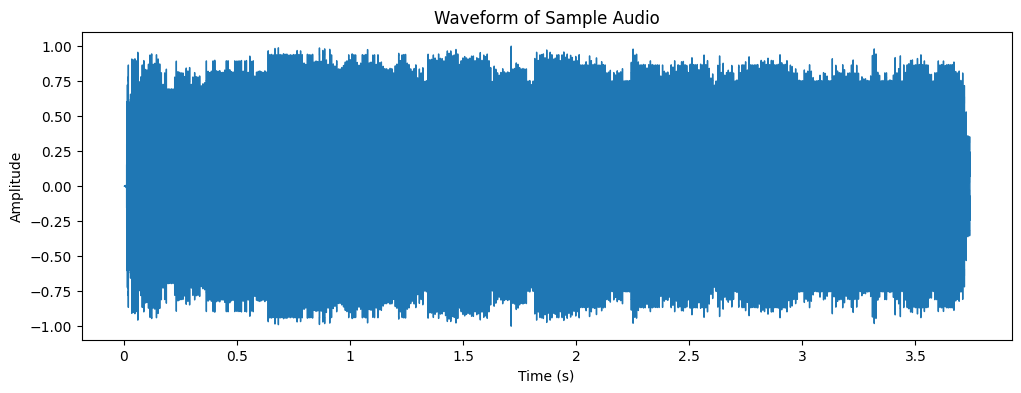

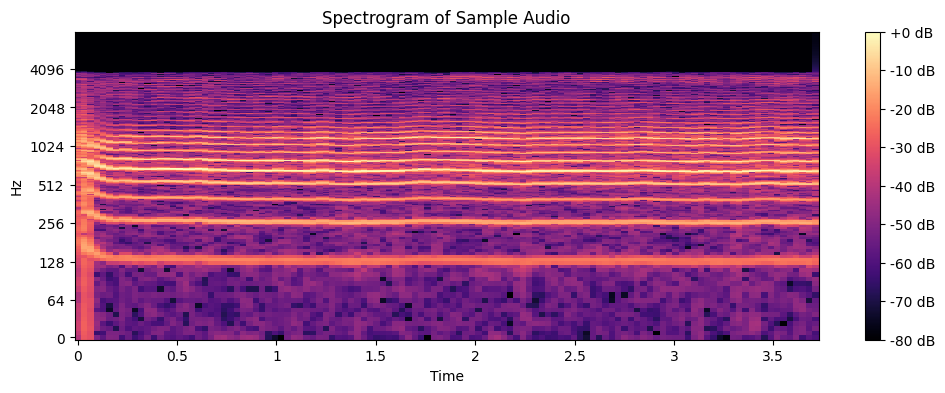

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset path
dataset_path = "/content/drive/My Drive/NeuroSpeechBert_Dataset"

# Pick a sample file (Update with an actual filename from your dataset)
sample_file = os.path.join(dataset_path, "HC_AH", "HC_AH", "AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav")


# Load audio
y, sr = librosa.load(sample_file, sr=None)  # Load with original sampling rate

# Print basic info
print(f"Sampling Rate: {sr} Hz")
print(f"Audio Duration: {len(y)/sr:.2f} seconds")

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Plot spectrogram
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Sample Audio")
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=22050)  # Load audio
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)


    plt.figure(figsize=(5, 5))
    librosa.display.specshow(mel_spectrogram_db, sr=sr)
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

HC_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH"
PD_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/PD_AH"
SPECTROGRAM_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/spectrograms"

HC_SPECTROGRAM_PATH = os.path.join(SPECTROGRAM_PATH, "HC")
PD_SPECTROGRAM_PATH = os.path.join(SPECTROGRAM_PATH, "PD")

# Ensure spectrogram output directories exist
os.makedirs(HC_SPECTROGRAM_PATH, exist_ok=True)
os.makedirs(PD_SPECTROGRAM_PATH, exist_ok=True)

# Process Healthy Control (HC_AH) files
for filename in os.listdir(HC_PATH):
    if filename.endswith(".wav"):
        output_filename = os.path.splitext(filename)[0] + ".png"  # Remove .wav extension
        save_spectrogram(os.path.join(HC_PATH, filename),
                         os.path.join(HC_SPECTROGRAM_PATH, output_filename))

# Process Parkinson’s Disease (PD_AH) files
for filename in os.listdir(PD_PATH):
    if filename.endswith(".wav"):
        output_filename = os.path.splitext(filename)[0] + ".png"  # Remove .wav extension
        save_spectrogram(os.path.join(PD_PATH, filename),
                         os.path.join(PD_SPECTROGRAM_PATH, output_filename))

print("Spectrograms saved successfully!")

Spectrograms saved successfully!


BASIC AUDIO PROCESSING

In [ ]:
for folder in [hc_folder, pd_folder]:
    for filename in os.listdir(folder):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder, filename)
            y_processed, sr = preprocess_audio(file_path)

            sf.write(file_path, y_processed, sr)

print("✅ All files preprocessed and saved in the same folder structure.")

✅ All files preprocessed and saved in the same folder structure.


FEATURE EXTRACTION

In [ ]:
!pip install opensmile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.0/996.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 kB 20.4 MB/s eta 0:00:00


In [ ]:
import opensmile
from tqdm import tqdm
import subprocess

In [ ]:
!pip install praat-parselmouth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.6 MB/s eta 0:00:00


In [ ]:
import parselmouth

def extract_parselmouth_features(file_path):
    try:
        snd = parselmouth.Sound(file_path)
        pitch = snd.to_pitch()
        mean_pitch = pitch.selected_array['frequency'].mean()

        return {"mean_pitch_parselmouth": mean_pitch}
    except Exception as e:
        print(f"Parselmouth error for {file_path}: {e}")
        return {"mean_pitch_parselmouth": None}

In [ ]:
OUTPUT_CSV = os.path.join(dataset_path, "extracted_features.csv")

# Initialize OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPS,
    feature_level=opensmile.FeatureLevel.Functionals,
)

/usr/local/lib/python3.11/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


In [ ]:
def get_sample_id(filename):
    try:
        filename = filename.replace(".wav", "")
        parts = filename.split("_")
        if len(parts) >= 2:
            return "_".join(parts[1:])  # Keep everything after "AH_"
        return filename
    except Exception as e:
        print(f"Error extracting sample ID from {filename}: {e}")
        return None



data = []
def extract_opensmile_features(file_path):
    try:
        features = smile.process_file(file_path)
        return features.to_dict(orient="records")[0]
    except Exception as e:
        print(f"OpenSMILE error for {file_path}: {e}")
        return {}


def extract_librosa_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y_trimmed, _ = librosa.effects.trim(y)

    # Extract MFCCs (Mean of 13 Coefficients)
    mfccs = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y_trimmed, sr=sr))

    # Pitch
    pitches, magnitudes = librosa.piptrack(y=y_trimmed, sr=sr)
    pitch_values = pitches[pitches > 0]
    pitch_mean = np.mean(pitch_values) if len(pitch_values) > 0 else 0

    return {
        "mfcc_1": mfccs_mean[0], "mfcc_2": mfccs_mean[1], "mfcc_3": mfccs_mean[2],
        "mfcc_4": mfccs_mean[3], "mfcc_5": mfccs_mean[4], "mfcc_6": mfccs_mean[5],
        "spectral_centroid": spectral_centroid,
        "pitch": pitch_mean
    }


def extract_all_features(file_path):
    try:
        sample_id = get_sample_id(os.path.basename(file_path))
        smile_features = extract_opensmile_features(file_path)
        librosa_features = extract_librosa_features(file_path)
        parselmouth_features = extract_parselmouth_features(file_path)
        return {"sample_id": sample_id, **smile_features, **librosa_features, **parselmouth_features}
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

data = []

# Process Parkinson’s Disease (PD) files
print("Processing PD_AH files...")
for file in tqdm(os.listdir(pd_folder)):
    file_path = os.path.join(pd_folder, file)
    if file.endswith(".wav"):
        features = extract_all_features(file_path)
        if features:
            features["label"] = "PD"
            data.append(features)

# Process Healthy Control (HC) files
print("Processing HC_AH files...")
for file in tqdm(os.listdir(hc_folder)):
    file_path = os.path.join(hc_folder, file)
    if file.endswith(".wav"):
        features = extract_all_features(file_path)
        if features:
            features["label"] = "HC"
            data.append(features)

# Convert extracted data to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/extracted_features(2).csv"
df.to_csv(csv_path, index=False)

print(f"✅ Feature extraction complete! CSV saved at: {csv_path}")
print(df.columns.tolist())

Processing PD_AH files...


100%|██████████| 40/40 [00:15<00:00,  2.56it/s]


Processing HC_AH files...


100%|██████████| 41/41 [00:16<00:00,  2.42it/s]


✅ Feature extraction complete! CSV saved at: /content/drive/MyDrive/NeuroSpeechBert_Dataset/extracted_features(2).csv
['sample_id', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'jitterLocal_sma3nz_amean', 'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean', 'shimm

In [ ]:
selected_features = [
    "sample_id",
    # Acoustic Features (Voice Quality & Harmonic Structure)
    "jitterLocal_sma3nz_amean", "jitterLocal_sma3nz_stddevNorm",
    "shimmerLocaldB_sma3nz_amean", "shimmerLocaldB_sma3nz_stddevNorm",
    "HNRdBACF_sma3nz_amean", "HNRdBACF_sma3nz_stddevNorm",

    # Prosodic Features (Pitch, Intensity, Duration,Speaking Rate)
    "F0semitoneFrom27.5Hz_sma3nz_amean", "F0semitoneFrom27.5Hz_sma3nz_stddevNorm",
    "F0semitoneFrom27.5Hz_sma3nz_percentile20.0", "F0semitoneFrom27.5Hz_sma3nz_percentile50.0",
    "F0semitoneFrom27.5Hz_sma3nz_percentile80.0", "loudness_sma3_amean",
    "loudness_sma3_stddevNorm", "VoicedSegmentsPerSec",
    "MeanVoicedSegmentLengthSec", "StddevVoicedSegmentLengthSec",

    # Spectral Features (Speech Clarity)
    "spectral_centroid", "mfcc_1", "mfcc_2", "mfcc_3", "mfcc_4", "mfcc_5", "mfcc_6",

    # Target Label (if available)
    "label"
]

existing_features = [feature for feature in selected_features if feature in df.columns]
filtered_df = df[existing_features]  # Include label for supervised learning

# Save the reduced dataset
output_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv"
filtered_df.to_csv(output_path, index=False)

print(f"✅ Feature selection complete! CSV saved at: {output_path}")
print(f"Selected Features: {len(existing_features)}")


✅ Feature selection complete! CSV saved at: /content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv
Selected Features: 25


Attention+AutoEncoder TRIAL 1

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, BatchNormalization, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv")  # Adjust path
X = df.iloc[:, 1:-1]
y = df["label"].map({"HC": 0, "PD": 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define Attention Layer
class Attention(Layer):
    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1), initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(shape=(1,), initializer='zeros', trainable=True)

    def call(self, inputs):
        e = tf.keras.activations.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)


In [ ]:
# Model
autoencoder = Model(inputs, reconstructed)
classifier = Model(inputs, output)

# Compile with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = classifier.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Predictions
y_train_pred = (classifier.predict(X_train) > 0.5).astype(int)
y_test_pred = (classifier.predict(X_test) > 0.5).astype(int)
y_train_prob = classifier.predict(X_train)
y_test_prob = classifier.predict(X_test)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.7862 - loss: 0.6207 - val_accuracy: 0.6154 - val_loss: 0.7374
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7173 - loss: 0.6449 - val_accuracy: 0.6154 - val_loss: 0.7373
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8033 - loss: 0.5305 - val_accuracy: 0.6154 - val_loss: 0.7372
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8654 - loss: 0.4832 - val_accuracy: 0.6154 - val_loss: 0.7362
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8414 - loss: 0.5094 - val_accuracy: 0.6154 - val_loss: 0.7357
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7663 - loss: 0.5619 - val_accuracy: 0.6154 - val_loss: 0.7361
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7605 - loss: 0.5852 - val_accuracy: 0.6154 - val_loss: 0.7350
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7480 - loss: 0.6021 - val_accuracy: 0.6154 - val_loss

In [ ]:
def evaluate_and_plot(y_train, y_train_pred, y_train_prob, y_test, y_test_pred, y_test_prob):
    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    print("\n🔍 Evaluation Summary:")
    print(f"✅ Training Accuracy : {train_acc:.4f}")
    print(f"✅ Testing Accuracy  : {test_acc:.4f}")
    print(f"✅ Precision         : {precision:.4f}")
    print(f"✅ Recall            : {recall:.4f}")
    print(f"✅ F1 Score          : {f1:.4f}")
    print(f"✅ ROC AUC (Train)   : {train_auc:.4f}")
    print(f"✅ ROC AUC (Test)    : {test_auc:.4f}")

    # Confusion Matrix (Test)
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.title("Confusion Matrix (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve: Train vs Test
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.2f}', color='blue')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {test_auc:.2f}', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves - Train vs Test")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔍 Evaluation Summary:
✅ Training Accuracy : 0.8125
✅ Testing Accuracy  : 0.5882
✅ Precision         : 0.5556
✅ Recall            : 0.6250
✅ F1 Score          : 0.5882
✅ ROC AUC (Train)   : 0.9170
✅ ROC AUC (Test)    : 0.6528


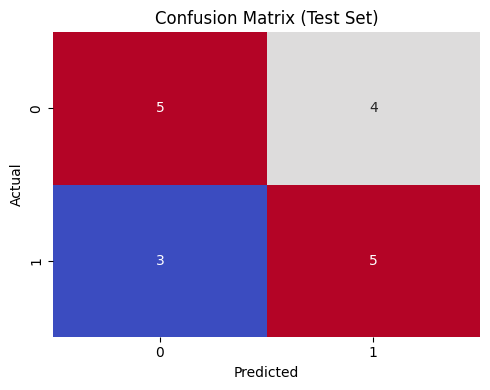

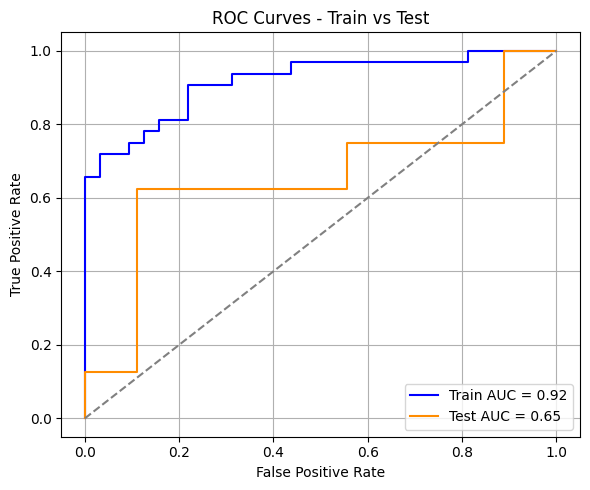

In [ ]:
evaluate_and_plot(y_train, y_train_pred, y_train_prob, y_test, y_test_pred, y_test_prob)

ATTENTION+AUTOENCODER TRIAL 2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer,Lambda, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Reshape

In [ ]:
# 🔹 Step 1: Load dataset
df = pd.read_csv("/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv")

# 🔹 Step 2: Feature and label separation
X = df.iloc[:, 1:-1]  # Exclude ID and label column
y = df["label"].map({"HC": 0, "PD": 1})  # Convert labels to 0/1

# 🔹 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Step 4: Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1), initializer='normal', trainable=True)
        self.b = self.add_weight(shape=(1,), initializer='zeros', trainable=True)

    def call(self, inputs):
        e = tf.keras.activations.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(inputs * a, axis=1)
        return output

# Input
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
x = Reshape((1, input_dim))(inputs) # shape: (batch, time_steps=1, features)

# Dense + Dropout + BatchNorm
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Attention layer
x = Attention()(x)

# Output layer
output = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs, output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Predict
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.3751 - loss: 1.3764 - val_accuracy: 0.4615 - val_loss: 0.7581
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4544 - loss: 1.1875 - val_accuracy: 0.4615 - val_loss: 0.7402
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4491 - loss: 0.9403 - val_accuracy: 0.4615 - val_loss: 0.7243
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4716 - loss: 1.0106 - val_accuracy: 0.5385 - val_loss: 0.7134
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4502 - loss: 1.0780 - val_accuracy: 0.6154 - val_loss: 0.7036
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5999 - loss: 0.6255 - val_accuracy: 0.5385 - val_loss: 0.6939
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5863 - loss: 0.8025 - val_accuracy: 0.6154 - val_loss: 0.6870
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5822 - loss: 0.7261 - val_accuracy: 0.6154 - val_loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
def print_metrics(y_true, y_pred, y_prob, dataset_type=""):
    print(f"\n📊 {dataset_type} Metrics:")
    print("Accuracy: ", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall:   ", round(recall_score(y_true, y_pred), 4))
    print("F1 Score: ", round(f1_score(y_true, y_pred), 4))
    print("AUC-ROC:  ", round(roc_auc_score(y_true, y_prob), 4))


📊 Train Metrics:
Accuracy:  0.6562
Precision: 0.7083
Recall:    0.5312
F1 Score:  0.6071
AUC-ROC:   0.7656

📊 Test Metrics:
Accuracy:  0.6471
Precision: 0.6667
Recall:    0.5
F1 Score:  0.5714
AUC-ROC:   0.625


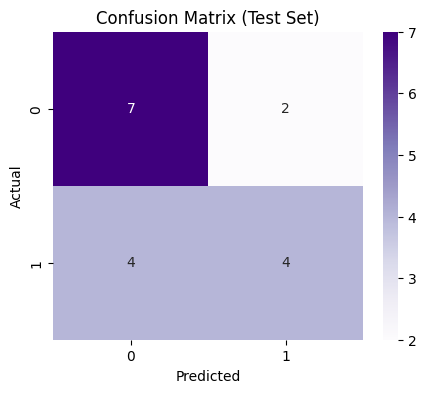

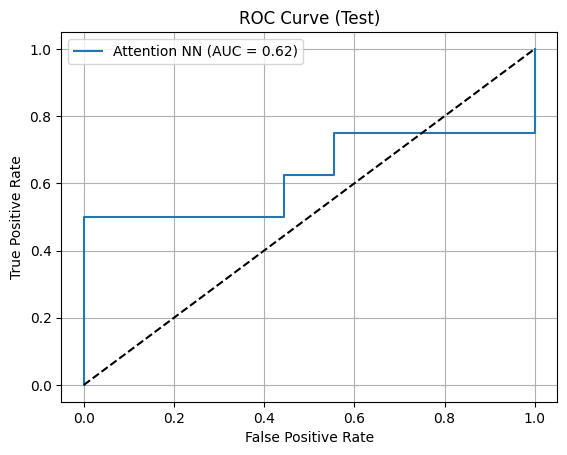

In [ ]:
print_metrics(y_train, y_train_pred, y_train_prob, "Train")
print_metrics(y_test, y_test_pred, y_test_prob, "Test")

# Confusion Matrix (only once)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (Test)
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label='Attention NN (AUC = %0.2f)' % roc_auc_score(y_test, y_test_prob))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend()
plt.grid()
plt.show()
plt.show()

XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 🔹 Step 1: Load dataset
df = pd.read_csv("/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv")

# 🔹 Step 2: Feature and label separation
X = df.iloc[:, 1:-1]  # Exclude ID and label column
y = df["label"].map({"HC": 0, "PD": 1})  # Convert labels to 0/1

# 🔹 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Step 4: Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# 🔹 XGBoost Training
xgb_model  = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,            # Reduce from 4 to 2
    learning_rate=0.1,     # Smaller step size
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_train_pred = xgb_model.predict(X_train)
y_train_prob = xgb_model.predict_proba(X_train)[:, 1]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:53:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost results

In [ ]:

def print_metrics(y_true, y_pred, y_proba, label="Test"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)

    print(f"\n📊 {label} Metrics:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc:.4f}")

In [ ]:
print_metrics(y_train_resampled, y_train_pred, y_train_proba, label="Train")
print_metrics(y_test, y_test_pred, y_test_proba, label="Test")

# 🔹 Confusion Matrix Plot Function
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


📊 Train Metrics:
Accuracy:  0.9062
Precision: 0.9062
Recall:    0.9062
F1 Score:  0.9062
AUC-ROC:   0.9756

📊 Test Metrics:
Accuracy:  0.5294
Precision: 0.5000
Recall:    0.5000
F1 Score:  0.5000
AUC-ROC:   0.6111


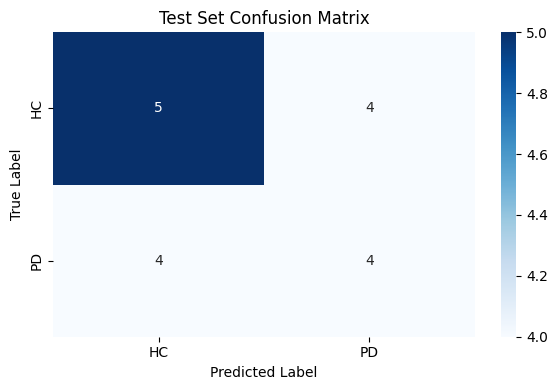

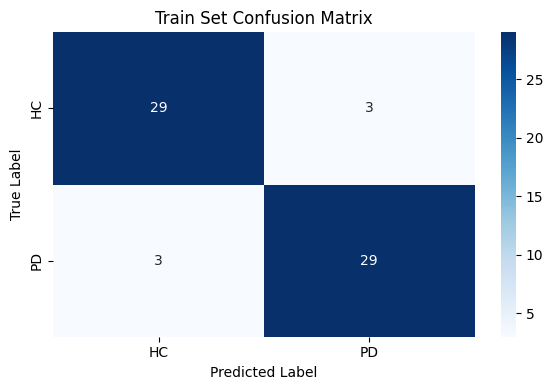

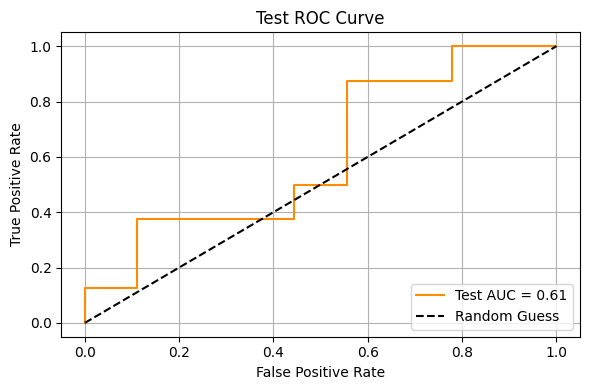

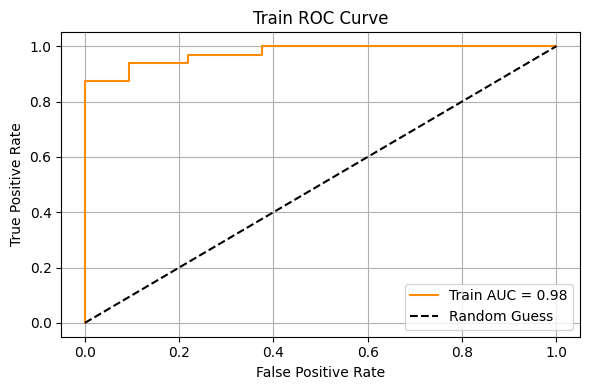

In [ ]:
def plot_roc_curve(y_true, y_proba, label="Test"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{label} AUC = {auc_score:.2f}', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"{label} ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🔹 Visuals
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")
plot_confusion_matrix(y_train_resampled, y_train_pred, "Train Set Confusion Matrix")

plot_roc_curve(y_test, y_test_proba, label="Test")
plot_roc_curve(y_train_resampled, y_train_proba, label="Train")

LightBGM

In [ ]:
# 🔹 Step 1: Load dataset
df = pd.read_csv("/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv")

# 🔹 Step 2: Feature and label separation
X = df.iloc[:, 1:-1]  # Exclude ID and label column
y = df["label"].map({"HC": 0, "PD": 1})  # Convert labels to 0/1

# 🔹 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Step 4: Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Train LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 🔮 Predictions
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)
y_train_proba = lgb_model.predict_proba(X_train)[:, 1]
y_test_proba = lgb_model.predict_proba(X_test)[:, 1]


[LightGBM] [Info] Number of positive: 32, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
def print_metrics(y_true, y_pred, y_proba, dataset="Train"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)

    print(f"\n📊 {dataset} Metrics:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc_roc:.4f}")
    return acc, prec, rec, f1, auc_roc



📊 Train Metrics:
Accuracy:  0.9375
Precision: 0.9667
Recall:    0.9062
F1 Score:  0.9355
AUC-ROC:   0.9883

📊 Test Metrics:
Accuracy:  0.5882
Precision: 0.5556
Recall:    0.6250
F1 Score:  0.5882
AUC-ROC:   0.5417


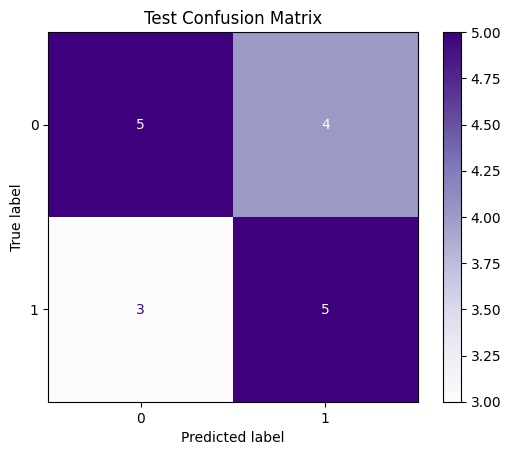

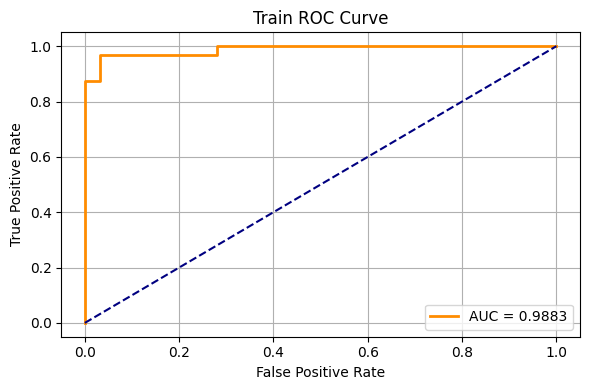

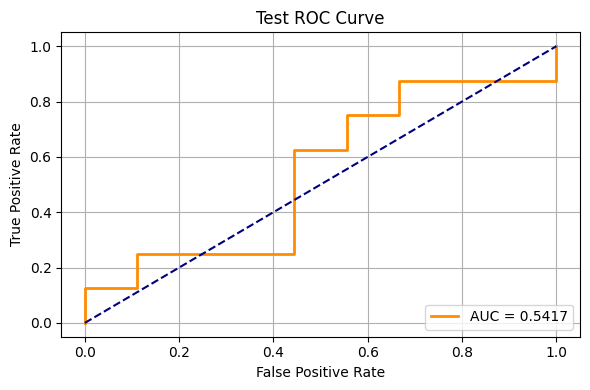

In [ ]:
train_metrics = print_metrics(y_train, y_train_pred, y_train_proba, "Train")
test_metrics = print_metrics(y_test, y_test_pred, y_test_proba, "Test")

# 🎨 Test Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples', values_format='d')
plt.title('Test Confusion Matrix')
plt.grid(False)
plt.show()

# 📈 ROC Curve
def plot_roc(y_true, y_proba, dataset="Test"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f'{dataset} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc(y_train, y_train_proba, "Train")
plot_roc(y_test, y_test_proba, "Test")

MLP/ FNN Classifier

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["label"])
y = df["label"].map({"HC": 0, "PD": 1})
X = df.iloc[:, 1:-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch DataLoaders
batch_size = min(16, len(X_train))  # Ensure batch size is not larger than dataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ParkinsonClassifier(nn.Module):
    def __init__(self, input_dim):
        super(ParkinsonClassifier, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Two classes: Healthy (0), Parkinson's (1)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
input_dim = X_train.shape[1]
model = ParkinsonClassifier(input_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert Data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Labels should be Long for CrossEntropyLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)


In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # Classification loss

    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/50], Loss: 0.6970
Epoch [2/50], Loss: 0.6900
Epoch [3/50], Loss: 0.6833
Epoch [4/50], Loss: 0.6769
Epoch [5/50], Loss: 0.6707
Epoch [6/50], Loss: 0.6647
Epoch [7/50], Loss: 0.6588
Epoch [8/50], Loss: 0.6532
Epoch [9/50], Loss: 0.6476
Epoch [10/50], Loss: 0.6420
Epoch [11/50], Loss: 0.6365
Epoch [12/50], Loss: 0.6312
Epoch [13/50], Loss: 0.6259
Epoch [14/50], Loss: 0.6207
Epoch [15/50], Loss: 0.6155
Epoch [16/50], Loss: 0.6103
Epoch [17/50], Loss: 0.6052
Epoch [18/50], Loss: 0.6001
Epoch [19/50], Loss: 0.5950
Epoch [20/50], Loss: 0.5899
Epoch [21/50], Loss: 0.5848
Epoch [22/50], Loss: 0.5797
Epoch [23/50], Loss: 0.5745
Epoch [24/50], Loss: 0.5692
Epoch [25/50], Loss: 0.5639
Epoch [26/50], Loss: 0.5586
Epoch [27/50], Loss: 0.5533
Epoch [28/50], Loss: 0.5479
Epoch [29/50], Loss: 0.5426
Epoch [30/50], Loss: 0.5372
Epoch [31/50], Loss: 0.5317
Epoch [32/50], Loss: 0.5263
Epoch [33/50], Loss: 0.5208
Epoch [34/50], Loss: 0.5153
Epoch [35/50], Loss: 0.5097
Epoch [36/50], Loss: 0.5040
E

In [ ]:
# Testing
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    test_loss = criterion(outputs, y_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get predicted class (0 or 1)

    # Compute Accuracy
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = (correct / total) * 100

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

Test Loss: 0.5988
Test Accuracy: 70.59%


✅ Accuracy: 70.59%
✅ Precision: 80.00%
✅ Recall: 72.73%
✅ F1 Score: 76.19%
✅ AUC-ROC Score: 0.74


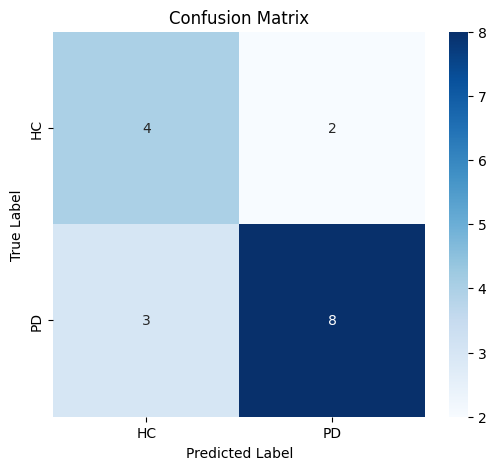

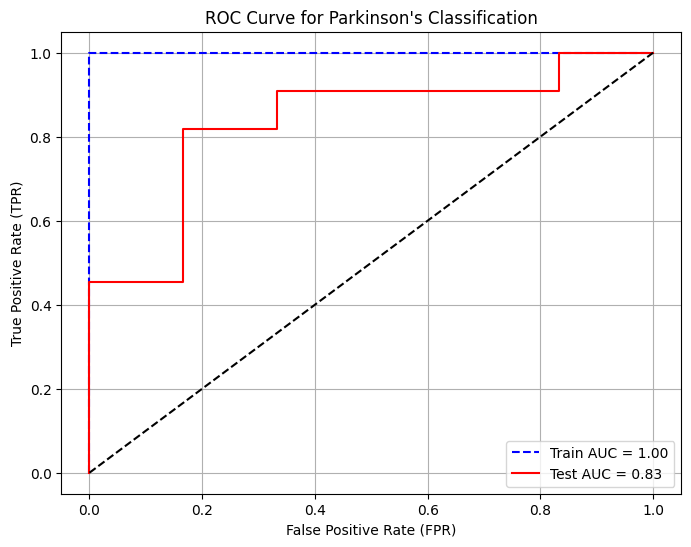

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Move model to eval mode
model.eval()

# Get predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get class predictions (0 or 1)
    probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get probability for class 1 (PD)

# Convert to NumPy
y_test_np = y_test_tensor.cpu().numpy()
y_pred_np = predicted.cpu().numpy()
y_prob_np = probabilities.cpu().numpy()

# 🔹 Compute Evaluation Metrics
accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)
auc_score = roc_auc_score(y_test_np, y_prob_np)

print(f"✅ Accuracy: {accuracy:.2%}")
print(f"✅ Precision: {precision:.2%}")
print(f"✅ Recall: {recall:.2%}")
print(f"✅ F1 Score: {f1:.2%}")
print(f"✅ AUC-ROC Score: {auc_score:.2f}")

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_np)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🔹 ROC Curve
fpr, tpr, _ = roc_curve(y_test_np, y_prob_np)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}", linestyle="--", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}", linestyle="-", color="red")
plt.plot([0, 1], [0, 1], linestyle="dashed", color="black")  # Random guess line

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Parkinson's Classification")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Function to compute accuracy
def compute_accuracy(model, X_tensor, y_tensor):
    model.eval()  # Set to evaluation mode
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        correct = (predicted == y_tensor).sum().item()
        total = y_tensor.size(0)
        accuracy = (correct / total) * 100
    return accuracy

# 🔹 Compute Accuracy
train_accuracy = compute_accuracy(model, X_train_tensor, y_train_tensor)
test_accuracy = compute_accuracy(model, X_test_tensor, y_test_tensor)

print(f"✅ Training Accuracy: {train_accuracy:.2f}%")
print(f"✅ Testing Accuracy: {test_accuracy:.2f}%")


✅ Training Accuracy: 85.71%
✅ Testing Accuracy: 70.59%


RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve,auc
)
import seaborn as sns


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Randomized Search with 5-Fold Cross-Validation
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Model
best_rf = random_search.best_estimator_

# Train best model
best_rf.fit(X_train, y_train)

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Print Best Parameters
print("🔹 Best Hyperparameters:", random_search.best_params_)

🔹 Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [ ]:
# Train Best Model with Optimized Hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=None,
    bootstrap=True,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Probabilities (for AUC-ROC)
y_train_prob = best_rf.predict_proba(X_train)[:, 1]
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"✅ Training Accuracy: {accuracy_train:.2%}")
print(f"✅ Testing Accuracy: {accuracy_test:.2%}")

print("\n🔹 Classification Report:\n", classification_report(y_test, y_test_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

y_train_prob = best_rf.predict_proba(X_train)[:, 1]
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

print(f"🔹 Train AUC Score: {auc_train:.2f}")
print(f"🔹 Test AUC Score: {auc_test:.2f}")


✅ Training Accuracy: 96.88%
✅ Testing Accuracy: 82.35%

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.90      0.82      0.86        11

    accuracy                           0.82        17
   macro avg       0.81      0.83      0.81        17
weighted avg       0.83      0.82      0.83        17


🔹 Confusion Matrix:
 [[5 1]
 [2 9]]
🔹 Train AUC Score: 1.00
🔹 Test AUC Score: 0.83


In [ ]:
import joblib

# Assuming 'rf_model' is your trained Random Forest model
joblib.dump(best_rf, "random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the model
rf_loaded = joblib.load("random_forest_model.pkl")

print("Model loaded successfully!")


Model loaded successfully!


<Figure size 500x400 with 0 Axes>

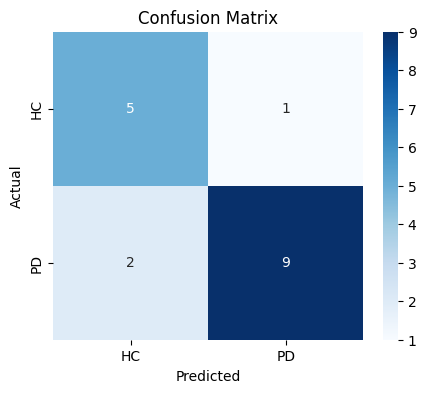

🔹 Train AUC Score: 1.00
🔹 Test AUC Score: 0.83
✅ AUC-ROC Score: 0.74


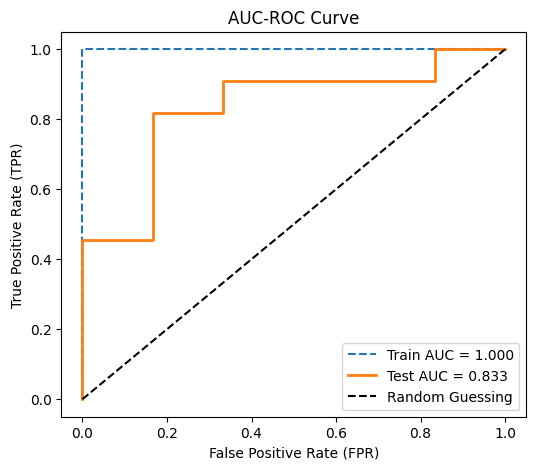

In [ ]:
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for the test set

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----- 🔹 Compute AUC-ROC -----
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# ----- 🔹 Plot AUC-ROC Curve -----
plt.figure(figsize=(6, 5))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", linestyle="--")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
# Compute AUC-ROC Score
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

print(f"🔹 Train AUC Score: {auc_train:.2f}")
print(f"🔹 Test AUC Score: {auc_test:.2f}")
print(f"✅ AUC-ROC Score: {auc_score:.2f}")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend()
plt.show()

SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, auc
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv"
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=["label"])
y = df["label"].map({"HC": 0, "PD": 1})
X = df.iloc[:, 1:-1]  # Convert labels to 0 (HC) and 1 (PD)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for PyTorch
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

✅ Training Accuracy: 54.29%
✅ Testing Accuracy: 47.06%

📄 Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         6
           1       1.00      0.18      0.31        11

    accuracy                           0.47        17
   macro avg       0.70      0.59      0.44        17
weighted avg       0.79      0.47      0.40        17

🔹 Confusion Matrix (Test Set):
[[6 0]
 [9 2]]


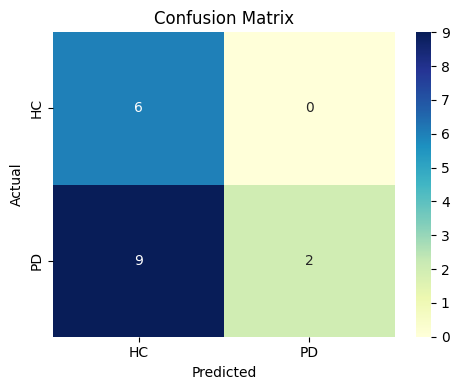

In [ ]:
# Train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 🔹 Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# 🔹 Probabilities (for AUC-ROC)
y_train_prob = svm_model.predict_proba(X_train)[:, 1]
y_test_prob = svm_model.predict_proba(X_test)[:, 1]

# 🔹 Model Evaluation Metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"✅ Training Accuracy: {accuracy_train:.2%}")
print(f"✅ Testing Accuracy: {accuracy_test:.2%}")

print("\n📄 Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("🔹 Confusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# 🔹 Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

🔹 Train AUC Score: 0.47
🔹 Test AUC Score: 0.35


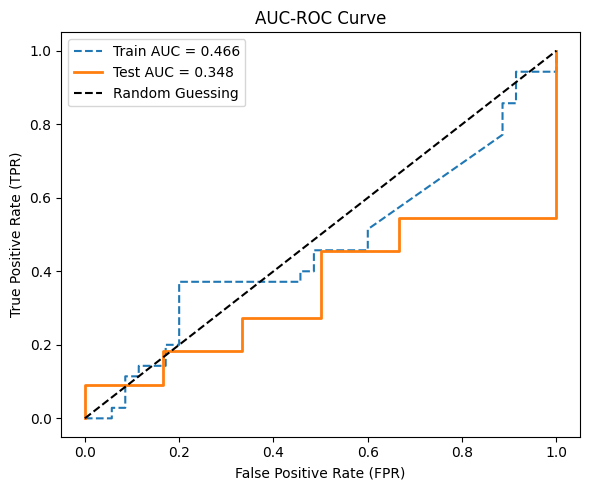

In [ ]:
# 🔹 Compute AUC-ROC Scores
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

print(f"🔹 Train AUC Score: {auc_train:.2f}")
print(f"🔹 Test AUC Score: {auc_test:.2f}")

# 🔹 Plot AUC-ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", linestyle="--")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()